In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def run_simu(coef):
    data_path = 'valeurs_sig_0'+str(coef)+'.csv'
    data = pd.read_csv(data_path, delimiter=',')
    vol_prox = data['1'].iloc[:120000]
    log_vol = np.log(vol_prox)
    plt.figure(figsize=(10, 6))
    plt.xlabel('t')
    plt.ylabel('sigma_t')
    plt.plot(vol_prox)
    plt.show()

    echelles_temps = range(2, 50)
    q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

    m_values = {q: [] for q in q_values}
    delta_values = []

    for delta in echelles_temps:
        for q in q_values:
            # Calcul de m(q, Delta) pour chaque q et Delta
            mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
            m_values[q].append(mq_delta)

        delta_values.append(delta)
    plt.figure(figsize=(10, 6))
    for q in q_values:
        plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

    plt.xlabel('log(Δ)')
    plt.ylabel('log(m(q, Δ))')
    plt.legend()
    plt.show()


    log_delta = np.log(delta_values)
    log_m_values = {q: np.log(m) for q, m in m_values.items()}

    # Étape 1: Régression de log(m) contre log(delta) pour chaque q
    slopes = []
    for q in q_values:
        X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
        model = sm.OLS(log_m_values[q], X).fit()
        slopes.append(model.params[1])  # Récupérer le coefficient de pente

    plt.figure(figsize=(6, 6))
    plt.xlabel('q')
    plt.ylabel('zeta(q)')
    plt.plot(q_values, slopes)
    plt.show()
    # Étape 2: Régression des coefficients (slopes) contre q
    X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
    model_h = sm.OLS(slopes, X).fit()
    H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

    print(f"Estimation du coefficient de Hurst, H: {H}")

    print(model_h.summary())

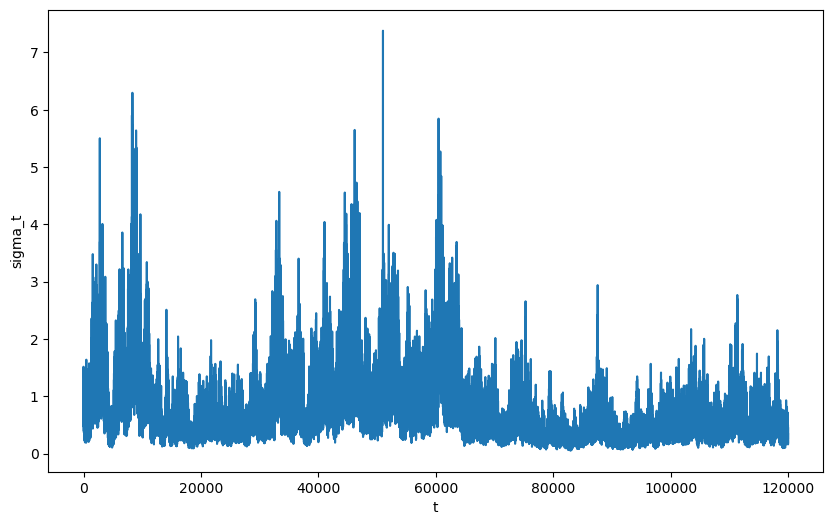

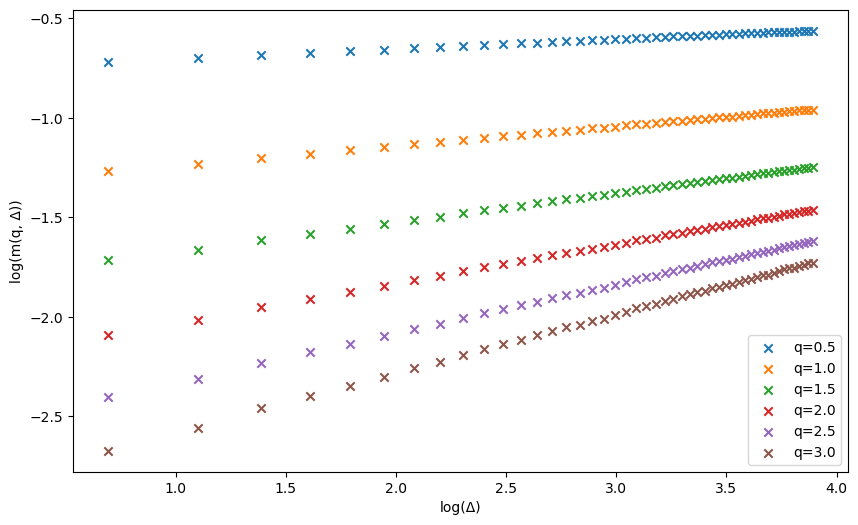

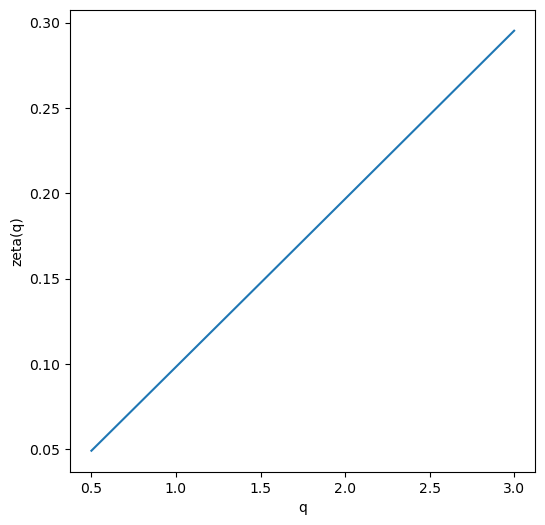

Estimation du coefficient de Hurst, H: 0.0984723832300257
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.766e+06
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.31e-13
Time:                        16:14:31   Log-Likelihood:                 49.365
No. Observations:                   6   AIC:                            -94.73
Df Residuals:                       4   BIC:                            -95.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [12]:
run_simu(1)

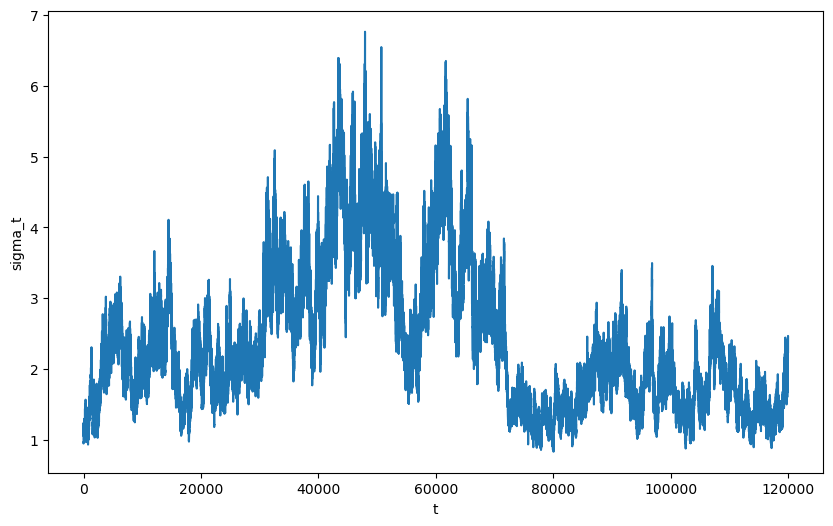

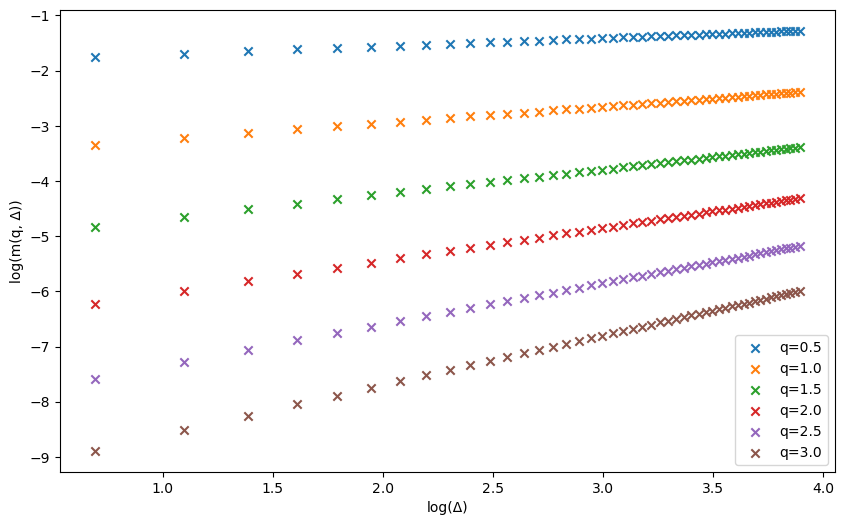

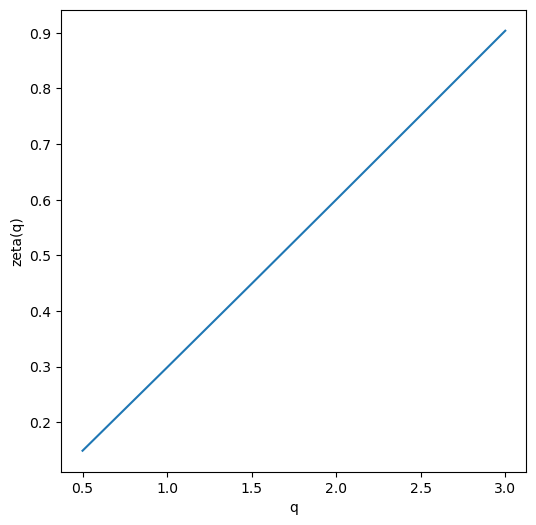

Estimation du coefficient de Hurst, H: 0.30198566502555974
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.740e+05
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.67e-11
Time:                        16:14:49   Log-Likelihood:                 34.666
No. Observations:                   6   AIC:                            -65.33
Df Residuals:                       4   BIC:                            -65.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [13]:
run_simu(3)

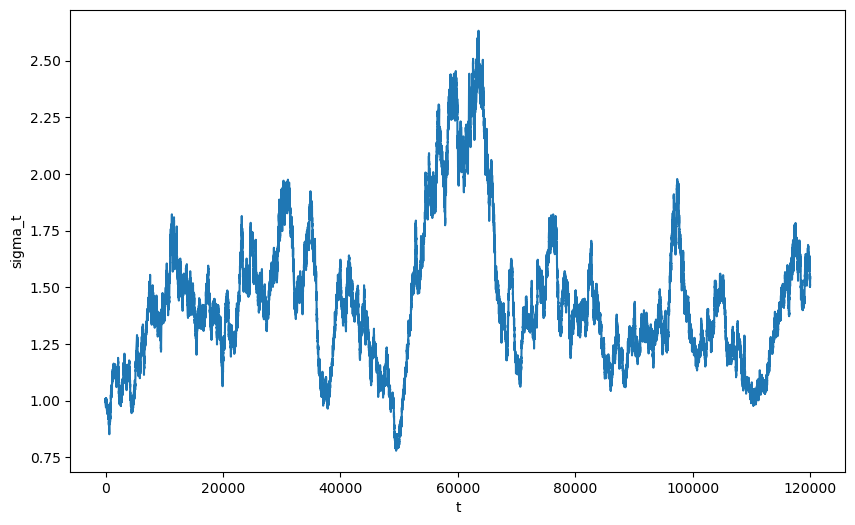

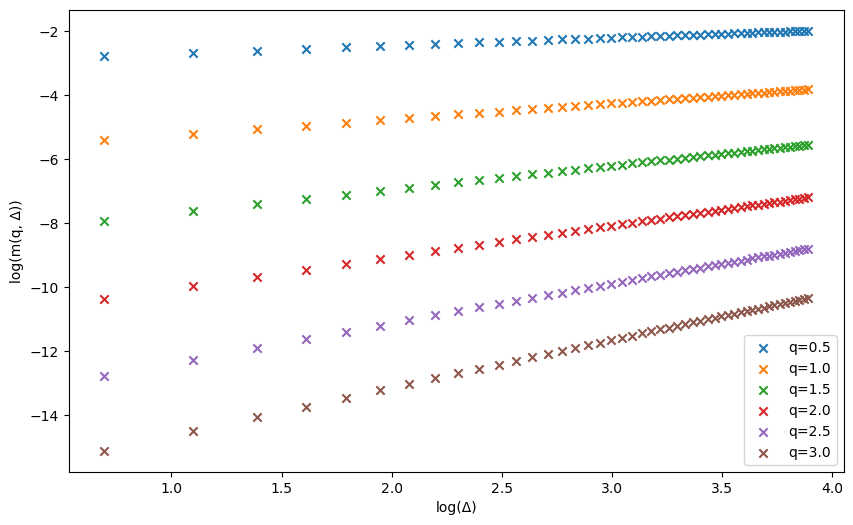

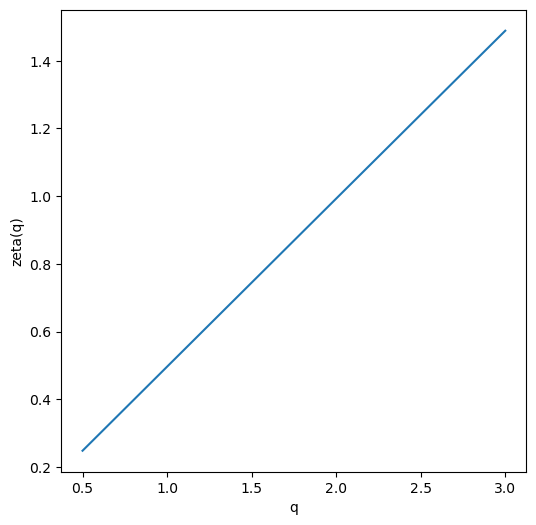

Estimation du coefficient de Hurst, H: 0.496196414770877
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.704e+07
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.37e-15
Time:                        16:14:54   Log-Likelihood:                 44.762
No. Observations:                   6   AIC:                            -85.52
Df Residuals:                       4   BIC:                            -85.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [14]:
run_simu(5)

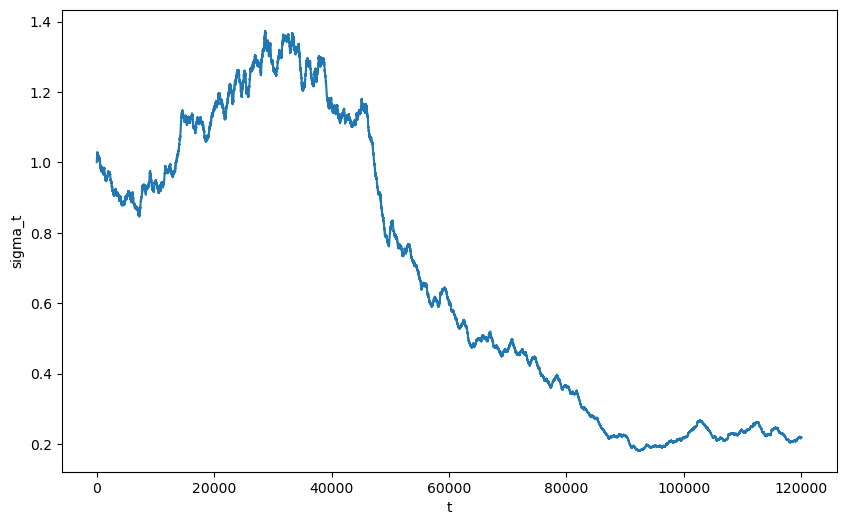

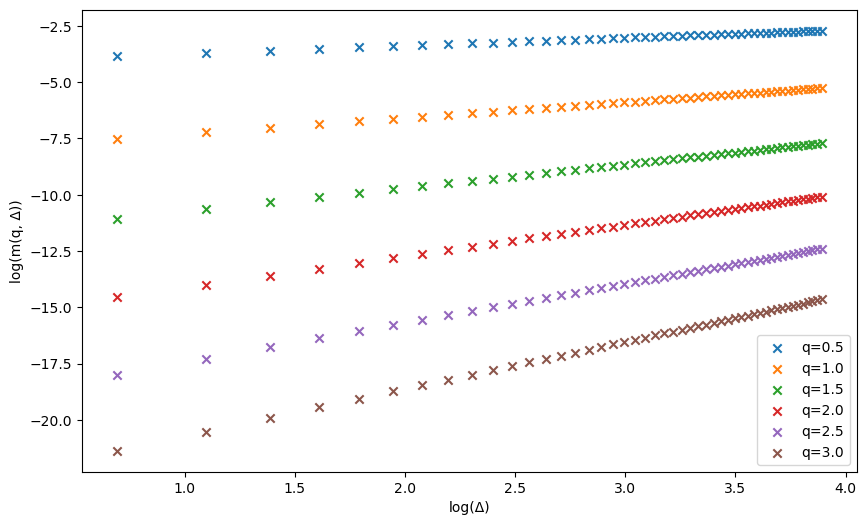

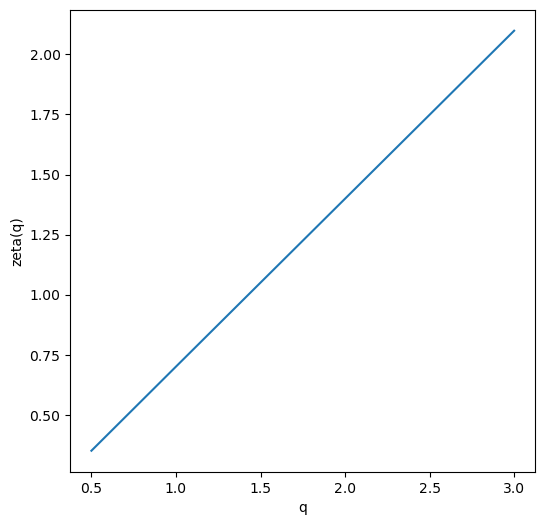

Estimation du coefficient de Hurst, H: 0.6988992551803829
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.290e+07
Date:                Sat, 04 May 2024   Prob (F-statistic):           3.26e-15
Time:                        16:15:00   Log-Likelihood:                 43.147
No. Observations:                   6   AIC:                            -82.29
Df Residuals:                       4   BIC:                            -82.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [15]:
run_simu(7)